In [82]:
folder_to_save_images = 'figs'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from evclust.ecm import ecm

In [83]:
all_scores = {}

## Easy Synth Clustering Example

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


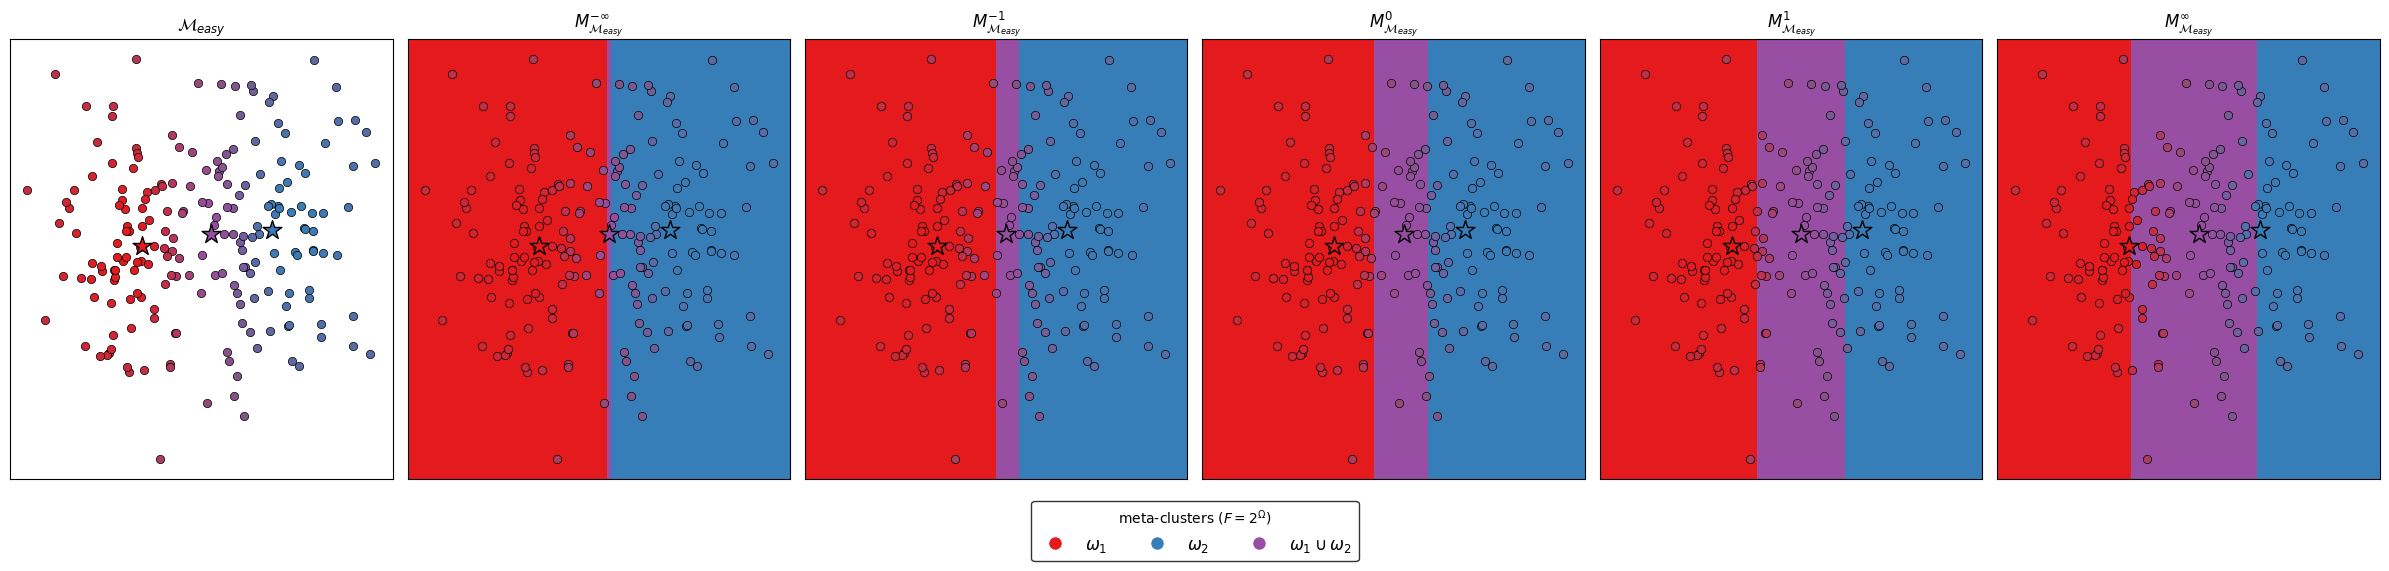

'easy'

,-inf,-1.0,0.0,1.0,inf
-inf,0.915796,0.808588,0.701380,0.701452,0.701524
-1.0,0.901122,0.819012,0.736903,0.749377,0.761850
0.0,0.876733,0.813867,0.751002,0.781731,0.812461
1.0,0.781247,0.751198,0.721149,0.811562,0.901975
inf,0.689432,0.669249,0.649067,0.789613,0.930160


In [84]:
experiment_name = 'two_clusters2D_synth'
folder_figs = folder_to_save_images + '/' + experiment_name

df = pd.read_csv('data/easy_synth_data.csv')
feature_names = df.columns[:-1].to_list()
features = df.iloc[:, :-1].values

number_clusters = 2
model = ecm(x=features, c=number_clusters, beta = 2,  alpha=1, delta=3, disp=False)

# model_names : (mass, F, lambda_num)
masses_to_test = {
    'easy': (model['mass_n'], model['F'][1:], 1),
}
cmap = 'Set1'
%run -i "iemm_notebook.ipynb"

In [85]:
# scores come from the iemm_notebook
all_scores.update(scores) # type: ignore

## Synth Example with 3 Clusters

/Users/victor/Documents/GitHub/iemm/.venv/lib/python3.9/site-packages/evclust/ecm.py:150: RuntimeWarning: overflow encountered in power
  vect1 = (np.tile(D[i, j], f-1) / vect0) ** (1 / (beta-1))
/Users/victor/Documents/GitHub/iemm/.venv/lib/python3.9/site-packages/evclust/ecm.py:152: RuntimeWarning: overflow encountered in multiply
  vect3 = vect1 * vect2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


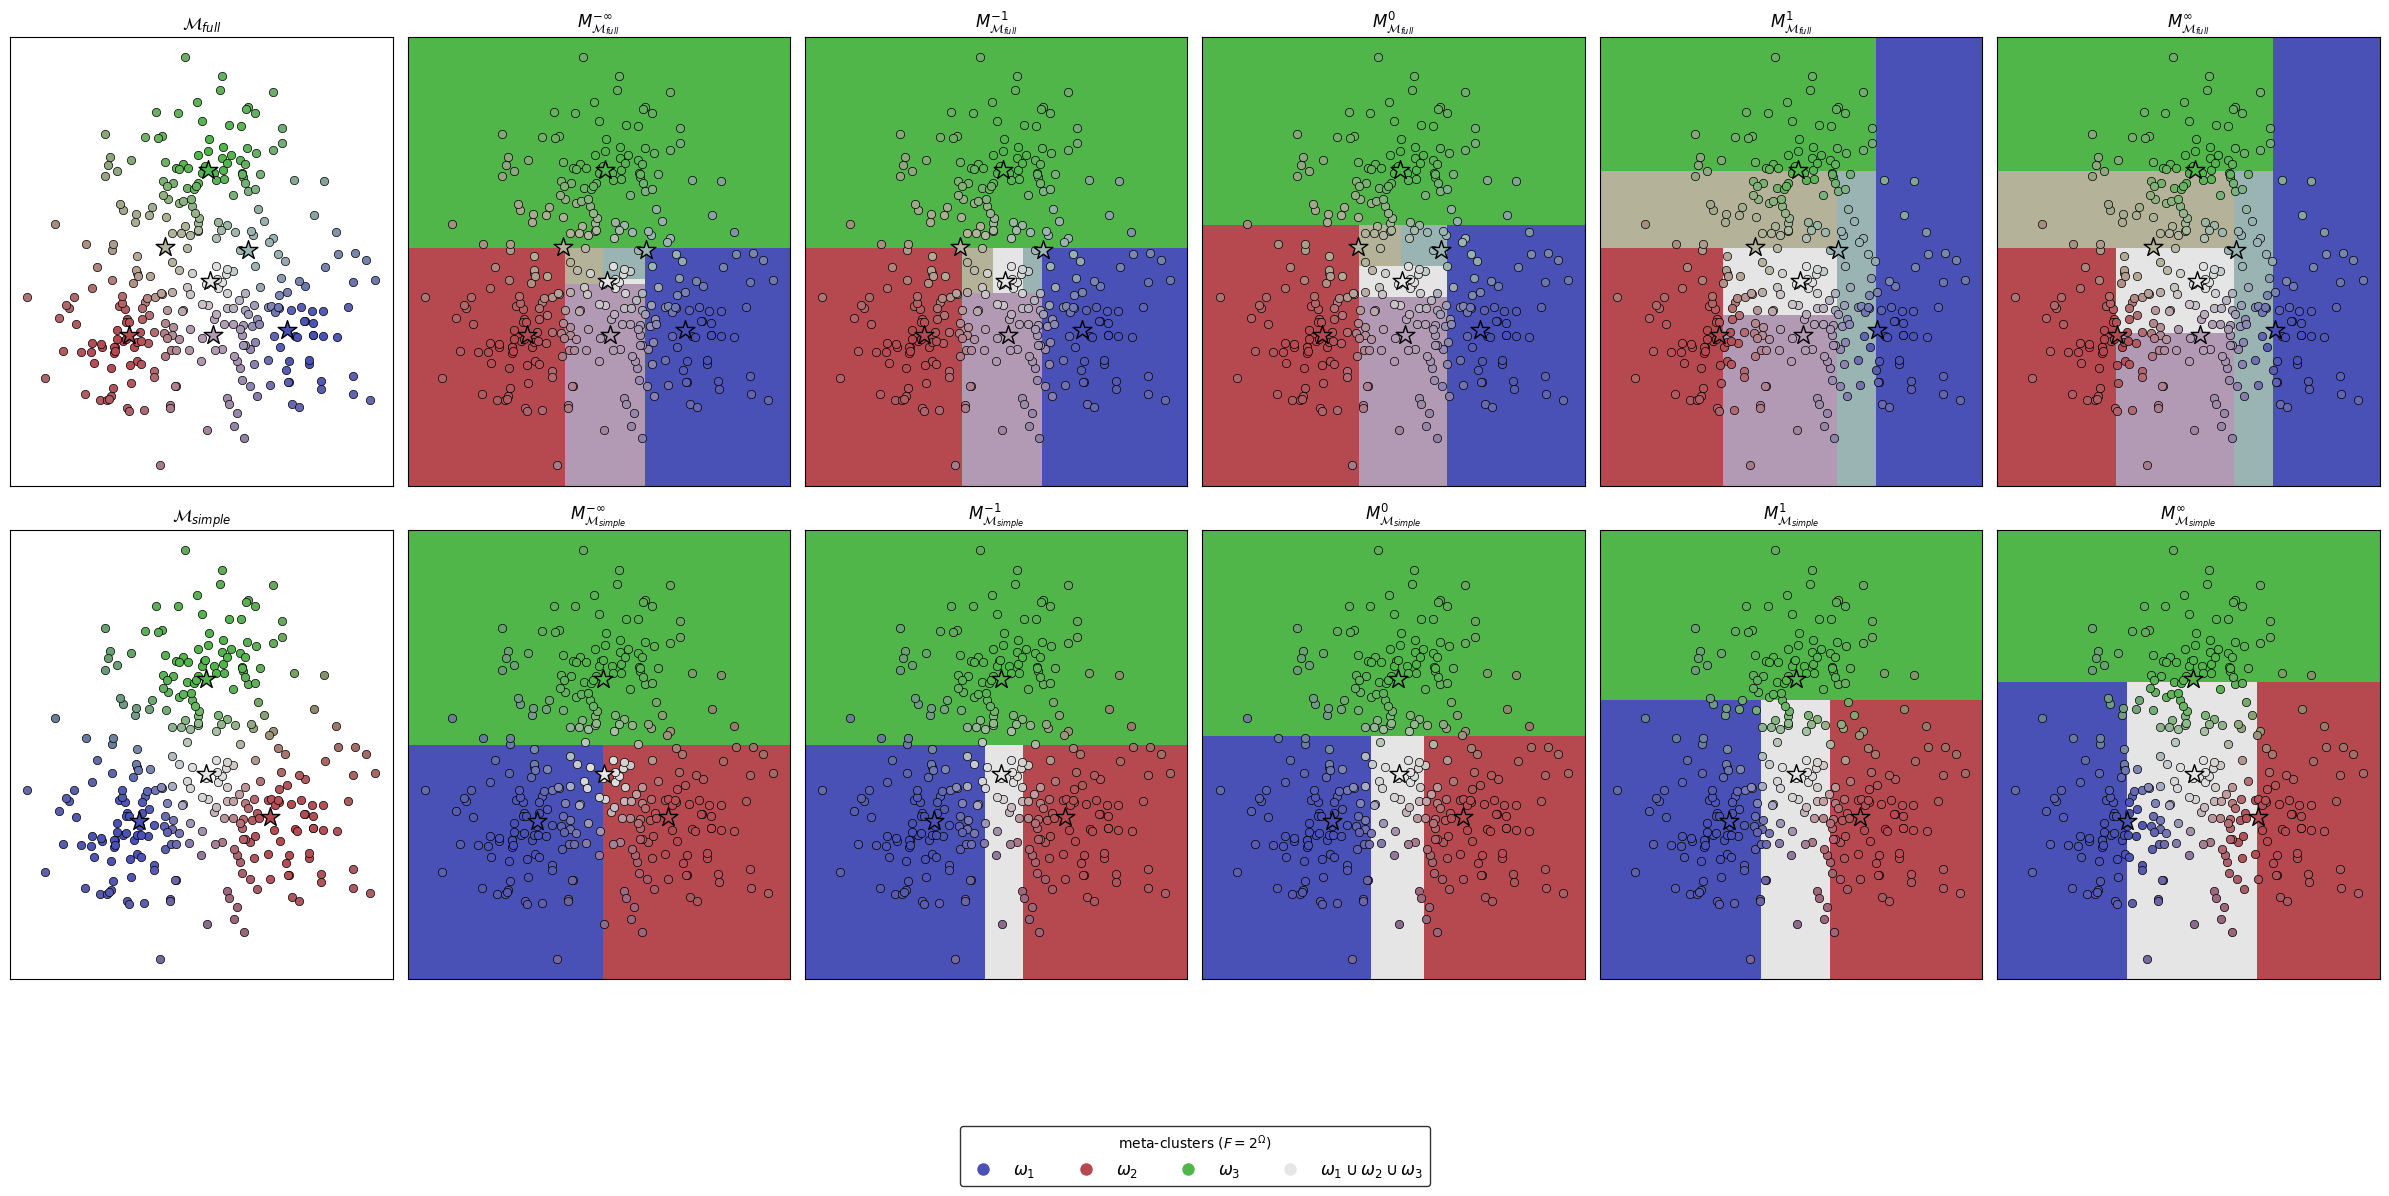

'full'

,-inf,-1.0,0.0,1.0,inf
-inf,0.882009,0.731303,0.575128,0.593766,0.612354
-1.0,0.881689,0.738726,0.598038,0.618498,0.638218
0.0,0.867413,0.745508,0.625343,0.656206,0.683719
1.0,0.642447,0.596290,0.542490,0.681838,0.809441
inf,0.621851,0.577133,0.526137,0.679054,0.818054


'simple'

,-inf,-1.0,0.0,1.0,inf
-inf,0.887444,0.781227,0.728118,0.728120,0.728125
-1.0,0.872286,0.799687,0.763387,0.772136,0.789634
0.0,0.866938,0.804483,0.773256,0.785821,0.810953
1.0,0.802770,0.761888,0.741446,0.778781,0.853452
inf,0.638852,0.617576,0.606938,0.708914,0.912866


In [86]:
experiment_name = 'three_clusters2D_synth'
folder_figs = folder_to_save_images + '/' + experiment_name

df = pd.read_csv('data/three_clusters2D_synth.csv')
feature_names = df.columns[:-1].to_list()
features = df.iloc[:, :-1].values

number_clusters = 3
full_model = ecm(x=features, c=number_clusters, alpha=0.5, beta = 1.8, delta=10, disp=False, type='full')
simple_model = ecm(x=features, c=number_clusters, alpha=0.5, beta = 1.8, delta=10, disp=False, type='simple')
rough_model = ecm(x=features, c=number_clusters, alpha=1, beta = 1.01, delta=10, disp=False, type='full')

# model_names : (mass, F, lambda_num)
masses_to_test = {
    'full': (full_model['mass_n'], full_model['F'][1:], 1),
    'simple': (simple_model['mass_n'], simple_model['F'][1:], 1),
    # 'rough': (rough_model['mass_n'], rough_model['F'][1:], 1)
}
cmap = 'personalized'

%run -i "iemm_notebook.ipynb"

In [87]:
# scores come from the iemm_notebook
all_scores.update(scores) # type: ignore

## Test on credal-datasets-master

In [88]:
# look into the folder credal-datasets-master for all folders
for folder in os.listdir('credal-datasets-master'):
    if folder == '.DS_Store':
        continue
    folder_path = 'credal-datasets-master/' + folder + '/data'
    
    df_features = pd.read_csv(folder_path + '/X.csv', sep=';', header=None)
    df_y = pd.read_csv(folder_path + '/y.csv', sep=';', header=None)

    feature_names = ['feature_' + str(i) for i in range(df_features.shape[1])]
    features = df_features.values

    M = df_y.values
    number_clusters = int(np.log2(M.shape[1]) )

    F = np.zeros((M.shape[1], number_clusters))
    for i in range(M.shape[1]):
        # i to binary in number_clusters bits
        F[i] = np.array(list(bin(i)[2:].zfill(int(number_clusters))))[::-1].astype(int)
    # remove outlier metacluster
    F = F[1:]
    M = M[:,1:]
    M = M / np.sum(M, axis=1)[:, np.newaxis]

    if M.shape[1] > 1:
        # too big for now, skip
        continue

    print('----')
    print(folder)
    print('shape of features:', features.shape)
    print('shape of M:', M.shape)
    print('shape of F:', F.shape)
    print('number of clusters:', number_clusters)

    # model_names : (mass, F, lambda_num)
    masses_to_test = {
        folder: (M, F, 1)
    }

    # run the iemm notebook
    folder_figs = folder_to_save_images + '/' + folder
    if not os.path.exists(folder_figs):
        os.makedirs(folder_figs)

    cmap = 'Set1'
    %run -i "iemm_notebook.ipynb"

    # scores come from the iemm_notebook
    all_scores.update(scores) # type: ignore

## Exporting Results

In [89]:
def dict_to_table(original_dict):
    keys = original_dict.keys()
    # for all key get what is after the last underscore
    index = list(set([key.split('_')[-1] for key in keys]))
    index = [round(float(i), 2) for i in index]
    
    # for all key get what is before the last underscore
    name_exp = list(set([key.split('_')[-2] for key in keys]))
    # for all key get what is before the last underscore
    name_dataset = list(set(["_".join(key.split('_')[:-2]) for key in keys]))
    
    columns = pd.MultiIndex.from_product([name_dataset, name_exp], names=['name_dataset', 'lambda'])

    # create a dataframe with the index and columns
    df_scores = pd.DataFrame(index=index, columns=columns)
    # fill the dataframe with the scores
    for key in keys:
        # get the value of the score
        value = original_dict[key]
        # get the index and column
        index = key.split('_')[-1]
        index = round(float(index), 2)
        lambda_value = key.split('_')[-2]
        name_exp = "_".join(key.split('_')[:-2])
        # fill the dataframe
        df_scores.loc[index, (name_exp, lambda_value)] = value

    # order columns alphabetically
    df_scores = df_scores.reindex(sorted(df_scores.columns), axis=1)
    # order index 
    df_scores = df_scores.reindex(sorted(df_scores.index), axis=0)
    
    return df_scores

In [90]:
for score in all_scores:
    scores_df = pd.DataFrame(all_scores[score])
    format_lambda = lambda x: '{:,.0f}'.format(x) if np.abs(x) < np.inf else r'\infty' if x > 0 else r'-\infty'
    scores_df.columns = [r'$\operatorname{Precision}_{\mathcal{M}_{'+score+r'}, \mathcal{U}^{' + format_lambda(c) + '}}$' for c in scores_df.columns]
    scores_df.index = [r'$M^{'+ format_lambda(i) +r'}_{\mathcal{M}_{'+score+r'}}$' for i in scores_df.index]
    display(scores_df)

    # latex format
    latex_table = scores_df.to_latex(escape=False, index=True, column_format='|l' + '|c' * (len(scores_df.columns)) + '|') 

    # Find the maximum value in each column and apply bold formatting
    for col in scores_df.columns:
        max_value = scores_df[col].max()
        latex_table = latex_table.replace(
            f"{max_value:.6f}", f"\\textbf{{{max_value:.6f}}}"
        )

    # Add horizontal and vertical lines to the header
    latex_table = latex_table.replace("\\toprule", "\\toprule\n\\hline")
    latex_table = latex_table.replace("\\midrule", "\\hline\n\\midrule")
    latex_table = latex_table.replace("\\bottomrule", "\\hline\n\\bottomrule")

    # save the table
    with open(folder_figs + '/' + score + '_scores.tex', 'w') as f:
        f.write(latex_table)

,"$\operatorname{Precision}_{\mathcal{M}_{easy}, \mathcal{U}^{-\infty}}$","$\operatorname{Precision}_{\mathcal{M}_{easy}, \mathcal{U}^{-1}}$","$\operatorname{Precision}_{\mathcal{M}_{easy}, \mathcal{U}^{0}}$","$\operatorname{Precision}_{\mathcal{M}_{easy}, \mathcal{U}^{1}}$","$\operatorname{Precision}_{\mathcal{M}_{easy}, \mathcal{U}^{\infty}}$"
$M^{-\infty}_{\mathcal{M}_{easy}}$,0.915796,0.808588,0.701380,0.701452,0.701524
$M^{-1}_{\mathcal{M}_{easy}}$,0.901122,0.819012,0.736903,0.749377,0.761850
$M^{0}_{\mathcal{M}_{easy}}$,0.876733,0.813867,0.751002,0.781731,0.812461
$M^{1}_{\mathcal{M}_{easy}}$,0.781247,0.751198,0.721149,0.811562,0.901975
$M^{\infty}_{\mathcal{M}_{easy}}$,0.689432,0.669249,0.649067,0.789613,0.930160


,"$\operatorname{Precision}_{\mathcal{M}_{full}, \mathcal{U}^{-\infty}}$","$\operatorname{Precision}_{\mathcal{M}_{full}, \mathcal{U}^{-1}}$","$\operatorname{Precision}_{\mathcal{M}_{full}, \mathcal{U}^{0}}$","$\operatorname{Precision}_{\mathcal{M}_{full}, \mathcal{U}^{1}}$","$\operatorname{Precision}_{\mathcal{M}_{full}, \mathcal{U}^{\infty}}$"
$M^{-\infty}_{\mathcal{M}_{full}}$,0.882009,0.731303,0.575128,0.593766,0.612354
$M^{-1}_{\mathcal{M}_{full}}$,0.881689,0.738726,0.598038,0.618498,0.638218
$M^{0}_{\mathcal{M}_{full}}$,0.867413,0.745508,0.625343,0.656206,0.683719
$M^{1}_{\mathcal{M}_{full}}$,0.642447,0.596290,0.542490,0.681838,0.809441
$M^{\infty}_{\mathcal{M}_{full}}$,0.621851,0.577133,0.526137,0.679054,0.818054


,"$\operatorname{Precision}_{\mathcal{M}_{simple}, \mathcal{U}^{-\infty}}$","$\operatorname{Precision}_{\mathcal{M}_{simple}, \mathcal{U}^{-1}}$","$\operatorname{Precision}_{\mathcal{M}_{simple}, \mathcal{U}^{0}}$","$\operatorname{Precision}_{\mathcal{M}_{simple}, \mathcal{U}^{1}}$","$\operatorname{Precision}_{\mathcal{M}_{simple}, \mathcal{U}^{\infty}}$"
$M^{-\infty}_{\mathcal{M}_{simple}}$,0.887444,0.781227,0.728118,0.728120,0.728125
$M^{-1}_{\mathcal{M}_{simple}}$,0.872286,0.799687,0.763387,0.772136,0.789634
$M^{0}_{\mathcal{M}_{simple}}$,0.866938,0.804483,0.773256,0.785821,0.810953
$M^{1}_{\mathcal{M}_{simple}}$,0.802770,0.761888,0.741446,0.778781,0.853452
$M^{\infty}_{\mathcal{M}_{simple}}$,0.638852,0.617576,0.606938,0.708914,0.912866
